In [60]:
## First, Let's import the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import scale
import pandas_profiling as pp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import re
from bs4 import BeautifulSoup
from html import unescape
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
plt.rcParams['figure.figsize'] = [6, 6]
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [51]:
## Next let's  load in the profiles data into a pandas Dataframe (df)
df = pd.read_csv('profiles.csv')

In [52]:
## Now let's do some initial cleaning of the data
df = df.replace('&rsquo;','\'', regex=True)
df.head()

age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   

                                              essay0  \
0  about me:<br />\n<br />\ni would love to think...   
1  i am a chef: this is what that means.<br />\n1...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                                              essay1  \
0  currently working as an international agent fo...   
1  dedicating everyday to being an unbelievable b...   
2  i make nerdy software for musicians, artists, ...   
3          reading things written by old dead people   
4                         work work work work + play   

                                              essay2  \
0  making people laugh.<br />\nranting about a go...   
1  being silly. having ridiculous amonts of fun w...   
2  improvising in different contexts. alternating...   
3  playing synthesizers and organizing books acco...   
4  creating imagery to look at:<br />\nhttp://bag...   

                                              essay3  ...  \
0  the way i look. i am a six foot half asian, ha...  ...   
1                                                NaN  ...   
2  my large jaw and large glasses are the physica...  ...   
3                  socially awkward but i do my best  ...   
4            i smile a lot and my inquisitive nature  ...   

                          location                               offspring  \
0  south san francisco, california  doesn't have kids, but might want them   
1              oakland, california  doesn't have kids, but might want them   
2        san francisco, california                                     NaN   
3             berkeley, california                       doesn't want kids   
4        san francisco, california                                     NaN   

  orientation                       pets  \
0    straight  likes dogs and likes cats   
1    straight  likes dogs and likes cats   
2    straight                   has cats   
3    straight                 likes cats   
4    straight  likes dogs and likes cats   

                                   religion sex                          sign  \
0     agnosticism and very serious about it   m                        gemini   
1  agnosticism but not too serious about it   m                        cancer   
2                                       NaN   m  pisces but it doesn't matter   
3                                       NaN   m                        pisces   
4                                       NaN   m                      aquarius   

      smokes                                             speaks     status  
0  sometimes                                            english     single  
1         no  english (fluently), spanish (poorly), french (...     single  
2         no                               english, french, c++  available  
3         no                           english, german (poorly)     single  
4         no                                            english     single  

[5 rows x 31 columns]

In [4]:
# Clean columns with HTML tags. escape character and \n
html_cols = ['essay0','essay1','essay2','essay3','essay4','essay5','essay6','essay7',       'essay8','essay9','offspring','sign']
# Clean HTML tags
def clean_html(text):
   # Skip NaN values since they will break the cleaning code.
    if pd.isna(text):
        clean_text = text 
    else:
        cleanr = re.compile('<.*?>')
        clean_text = re.sub(cleanr,'',text)
    return clean_text
# Remove escape characters 
def str_unescape(text):
    # Skip NaN values since they will break the uncescape function
    if pd.isna(text):
        clean_txt = text
    else:
        clean_txt = unescape(text)
    return clean_txt 
for col in html_cols:
     df[col] = df[col].str.replace('\n',' ')
     df[col] = df[col].apply(lambda x : clean_html(x))
     df[col] = df[col].apply(lambda x: str_unescape(x))
# Check if the text was cleaned up          
print(df.iloc[8])

age                                                           24
body_type                                                    NaN
diet                                           strictly anything
drinks                                                  socially
drugs                                                        NaN
education                      graduated from college/university
essay0                                                       NaN
essay1         oh goodness. at the moment i have 4 jobs, so i...
essay2                                                       NaN
essay3         i'm freakishly blonde and have the same name a...
essay4         i am always willing to try new foods and am no...
essay5         sports/my softball glove coffee. because nobod...
essay6                                                       NaN
essay7         in or out... drinking with friends, maybe a ba...
essay8         potential friends/lovers/people who come in co...
essay9         http://www

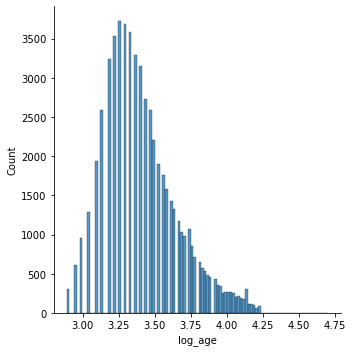

In [5]:
# Normalize age
df_age = df['age']

df['log_age'] = df.age.apply(lambda x: np.log(x))

sns.displot(df.log_age)
plt.show()

df.log_age = df.log_age.fillna(df.log_age.mean())

In [6]:
## What are the columns?
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status', 'log_age'],
      dtype='object')

In [7]:
## What are the dtypes of each column?
df.dtypes

age              int64
body_type       object
diet            object
drinks          object
drugs           object
education       object
essay0          object
essay1          object
essay2          object
essay3          object
essay4          object
essay5          object
essay6          object
essay7          object
essay8          object
essay9          object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
offspring       object
orientation     object
pets            object
religion        object
sex             object
sign            object
smokes          object
speaks          object
status          object
log_age        float64
dtype: object

In [8]:
## How many rows, columns in the data?
df.shape

(59946, 32)

In [9]:
## Summary statistics of our quantitative variables
df.describe()

age        height          income       log_age
count  59946.000000  59943.000000    59946.000000  59946.000000
mean      32.340290     68.295281    20033.222534      3.438675
std        9.452779      3.994803    97346.192104      0.267559
min       18.000000      1.000000       -1.000000      2.890372
25%       26.000000     66.000000       -1.000000      3.258097
50%       30.000000     68.000000       -1.000000      3.401197
75%       37.000000     71.000000       -1.000000      3.610918
max      110.000000     95.000000  1000000.000000      4.700480

In [10]:
##  What unique values are within the columns of our dataset?
for i in df.columns:
    print(df[i].value_counts())

26     3724
27     3685
28     3583
25     3531
29     3295
24     3242
30     3149
31     2735
23     2592
32     2587
33     2206
22     1934
34     1902
35     1755
36     1583
37     1427
38     1330
21     1282
39     1172
42     1072
40     1030
41      980
20      953
43      858
44      708
45      643
19      611
46      578
47      529
48      481
49      459
50      437
51      350
52      344
18      309
56      271
54      267
55      265
57      256
53      252
59      221
58      197
60      195
61      176
62      167
63      138
64      113
65      109
66      105
67       66
68       59
69       31
110       1
109       1
Name: age, dtype: int64
average           14652
fit               12711
athletic          11819
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: body_type, dtype: int64
mostly any

2012-06-29-22-56    24
2012-06-30-21-51    23
2012-06-30-22-09    23
2012-06-30-22-56    23
2012-06-30-23-27    23
                    ..
2011-08-23-23-25     1
2011-11-14-20-18     1
2012-05-07-18-14     1
2012-05-31-19-01     1
2012-06-14-16-51     1
Name: last_online, Length: 30123, dtype: int64
san francisco, california         31064
oakland, california                7214
berkeley, california               4212
san mateo, california              1331
palo alto, california              1064
                                  ...  
south wellfleet, massachusetts        1
orange, california                    1
astoria, new york                     1
london, united kingdom                1
rochester, michigan                   1
Name: location, Length: 199, dtype: int64
doesn't have kids                          7560
doesn't have kids, but might want them     3875
doesn't have kids, but wants them          3565
doesn't want kids                          2927
has kids                  

In [11]:
## Create aa pandas profiling report, for fun and efficient EDA.
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/46 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
## Let's clean up some of the variables we're working with. Religion and Sign have a lot of noise.
df['cleaned_sign'] = df.sign.str.split().str.get(0)
print("num of signs:",df.cleaned_sign.nunique())
print("signs:",df.cleaned_sign.unique())

df['cleaned_religion'] = df.religion.str.split().str.get(0)
print("num of religions:",df.cleaned_religion.nunique())
print("religions:",df.cleaned_religion.unique())


num of signs: 12
signs: ['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' nan 'aries' 'libra' 'scorpio' 'capricorn']
num of religions: 9
religions: ['agnosticism' nan 'atheism' 'christianity' 'other' 'catholicism'
 'buddhism' 'judaism' 'hinduism' 'islam']


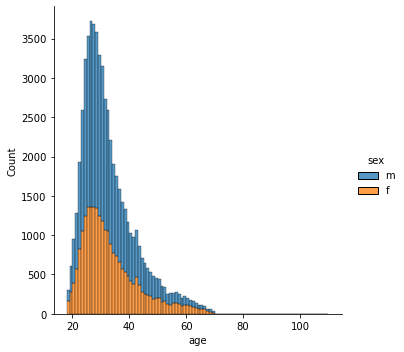

In [13]:
## Let's graph all of our variables
sns.displot(data=df, x="age", kind="hist", binwidth = 1, hue='sex', multiple='stack')

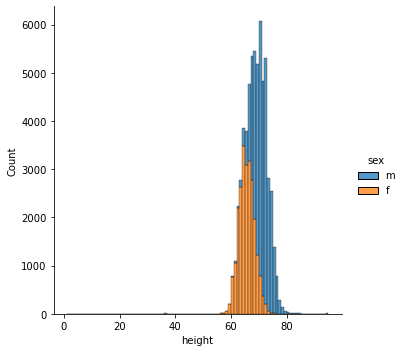

In [14]:
sns.displot(data=df, x="height", kind="hist", binwidth = 1, hue='sex', multiple='stack')

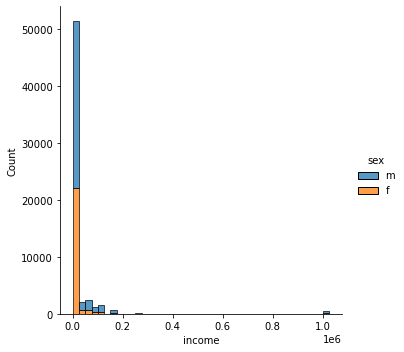

In [15]:
sns.displot(data=df, x="income", kind="hist", binwidth = 25000, hue='sex', multiple='stack')

<AxesSubplot:xlabel='count', ylabel='sex'>

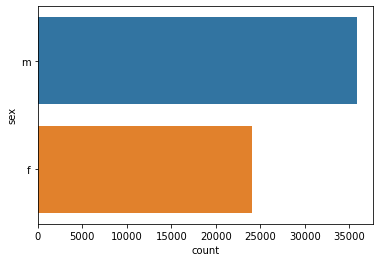

In [16]:
sns.countplot(y=df.sex)

<AxesSubplot:xlabel='count', ylabel='body_type'>

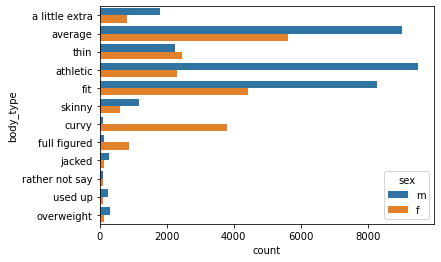

In [17]:
sns.countplot(y=df.body_type, hue=df.sex)

<AxesSubplot:xlabel='count', ylabel='diet'>

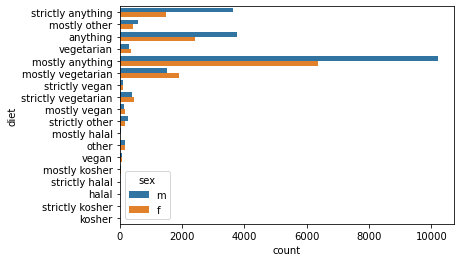

In [18]:
sns.countplot(y=df.diet, hue=df.sex)

<AxesSubplot:xlabel='count', ylabel='drinks'>

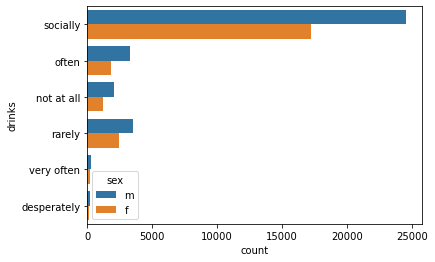

In [19]:
sns.countplot(y=df.drinks, hue=df.sex)

<AxesSubplot:xlabel='count', ylabel='drugs'>

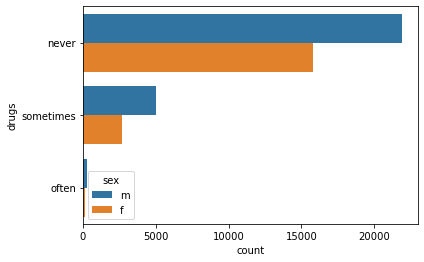

In [20]:
sns.countplot(y=df.drugs, hue=df.sex)

<AxesSubplot:xlabel='count', ylabel='education'>

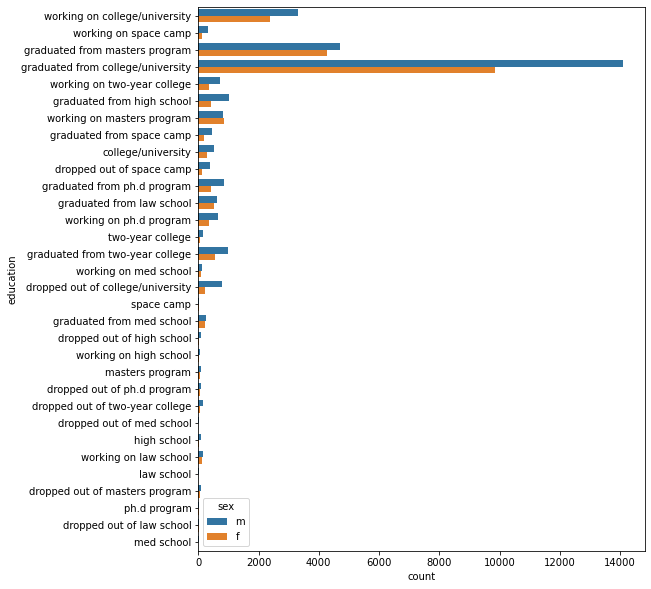

In [21]:
plt.figure(figsize=(8,10))
sns.countplot(y=df.education,  hue=df.sex)

<AxesSubplot:xlabel='count', ylabel='job'>

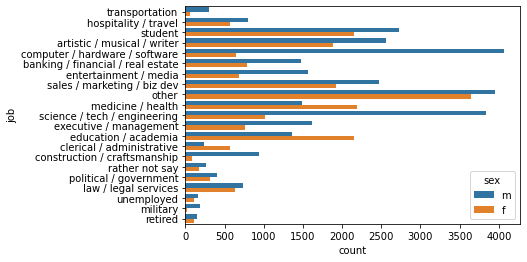

In [22]:
sns.countplot(y=df.job, hue=df.sex)

<AxesSubplot:xlabel='count', ylabel='offspring'>

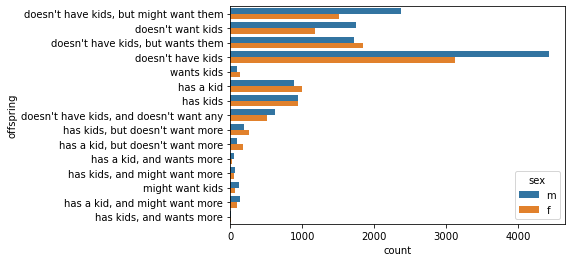

In [23]:
sns.countplot(y=df.offspring, hue=df.sex)

<AxesSubplot:xlabel='count', ylabel='orientation'>

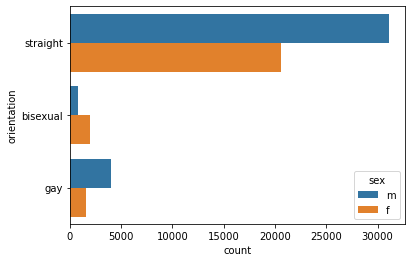

In [24]:
sns.countplot(y=df.orientation, hue=df.sex)

<AxesSubplot:xlabel='count', ylabel='pets'>

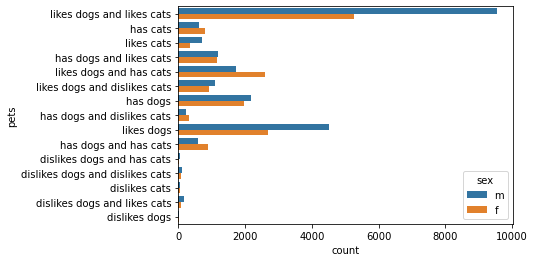

In [25]:
sns.countplot(y=df.pets,hue=df.sex)

<AxesSubplot:xlabel='count', ylabel='cleaned_religion'>

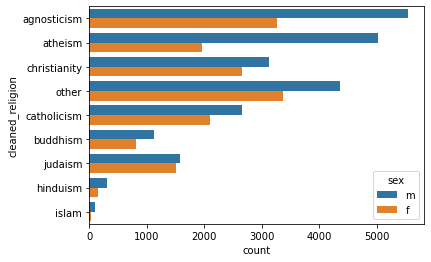

In [26]:
sns.countplot(y=df.cleaned_religion, hue=df.sex)

<AxesSubplot:xlabel='count', ylabel='cleaned_sign'>

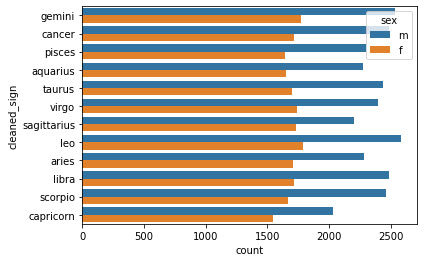

In [27]:
sns.countplot(y=df.cleaned_sign, hue=df.sex)

<AxesSubplot:xlabel='count', ylabel='smokes'>

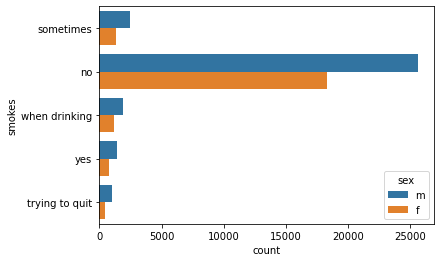

In [28]:
sns.countplot(y=df.smokes, hue=df.sex)

<AxesSubplot:xlabel='count', ylabel='status'>

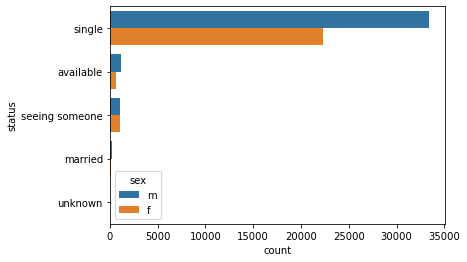

In [29]:
sns.countplot(y=df.status, hue=df.sex)

In [30]:
# Empty values in each column
df.isna().sum()

age                     0
body_type            5296
diet                24395
drinks               2985
drugs               14080
education            6628
essay0               5488
essay1               7572
essay2               9638
essay3              11476
essay4              10537
essay5              10850
essay6              13771
essay7              12451
essay8              19225
essay9              12603
ethnicity            5680
height                  3
income                  0
job                  8198
last_online             0
location                0
offspring           35561
orientation             0
pets                19921
religion            20226
sex                     0
sign                11056
smokes               5512
speaks                 50
status                  0
log_age                 0
cleaned_sign        11056
cleaned_religion    20226
dtype: int64

In [31]:
## Let's numericize the qualitative data where possible
# For education: 0 - less than college, 1 - college, 2 - more than college
edu_map = {'dropped out of high school': 0,
             'working on high school' : 0, 
             'high school': 0, 
             'graduated from high school': 0, 
             'dropped out of two-year college': 0,
             'dropped out of space camp': 0,
             'working on two-year college': 0,
             'working on space camp': 0,
             'space camp': 0,
             'two-year college': 0,
             'graduated from space camp': 0,
             'graduated from two-year college': 0,
             'dropped out of college/university': 0,
             'working on college/university': 1,
             'college/university': 1,
             'graduated from college/university': 1,
             'dropped out of masters program': 1,
             'working on masters program': 2,
             'masters program': 2,
             'graduated from masters program': 2,
             'dropped out of law school': 1,
             'working on law school': 2,
             'law school': 2,
             'graduated from law school': 2,
             'dropped out of med school': 1,
             'working on med school': 2,
             'med school': 2,
             'graduated from med school': 2,
             'dropped out of ph.d program': 2,
             'working on ph.d program': 2,
             'ph.d program': 2,
             'graduated from ph.d program': 2}
df['edu_int'] = df.education.map(edu_map).replace(np.nan, 0)
# Change from a float
df.edu_int = df.edu_int.astype(int)
df.edu_int.head()

0    1
1    0
2    2
3    1
4    1
Name: edu_int, dtype: int32

In [32]:
# Clean up NaN values and numericize our cleaned_religion column
df.cleaned_religion.replace('nan', np.NaN, inplace = True)
df.cleaned_religion = df.cleaned_religion.apply(lambda x: 'not religious' if pd.isnull(x) else x)
df['religion_int'] = df.cleaned_religion.map({'not religious': 0, 'agnosticism': 0, 'atheism': 0, 'other': 0, 'christianity': 1, 'catholicism': 1, 'judaism': 1, 'buddhism': 1, 'hinduism': 1, 'islam': 1})
df.religion_int.head()


0    0
1    0
2    0
3    0
4    0
Name: religion_int, dtype: int64

In [33]:
## Cleaned up NaN, numericize Smoker status
df['smoker_int'] = df.smokes.map({'no':0,'sometimes':1,'when drinking':1,'yes':2,'trying to quit': 2}).replace(np.nan, 0)
df['smoker_int'] =df.smoker_int.astype(int)
df.smoker_int.head()

0    1
1    0
2    0
3    0
4    0
Name: smoker_int, dtype: int32

In [34]:
## Drinking
df['drinks_int'] = df.drinks.map({'not at all': 0, 'rarely': 1, 'socially': 2, 'often': 3, 'very often': 4, 'desperately': 5}).replace(np.nan, 0)
df['drinks_int'] = df.drinks_int.astype(int)
df.drinks_int.head()

0    2
1    3
2    2
3    2
4    2
Name: drinks_int, dtype: int32

In [35]:
## Drugs
df['drugs_int'] = df.drugs.map({'never':0,'sometimes':1,'often':2}).replace(np.nan, 0)
df.drugs_int = df.drugs_int.astype(int)
df.drugs_int.head()

0    0
1    1
2    0
3    0
4    0
Name: drugs_int, dtype: int32

In [36]:
## Diet - One Hot Encoding
## Split out the meaninful word, ditch strictly/mostly qualifiers
df['diet_clean'] = df.diet.apply(lambda x: str(x).split(' ')[-1])
## Replace string nan values with np.nan values for easier changes
df.diet_clean.replace('nan', np.NaN, inplace = True)
## if the value is nan, make it 'anything'
df.diet_clean = df.diet_clean.apply(lambda x: 'anything' if pd.isnull(x) else x)
df = pd.get_dummies(data=df, columns=['diet_clean'])
df.head()


age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   

                                              essay0  \
0  about me:  i would love to think that i was so...   
1  i am a chef: this is what that means. 1. i am ...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                                              essay1  \
0  currently working as an international agent fo...   
1  dedicating everyday to being an unbelievable b...   
2  i make nerdy software for musicians, artists, ...   
3          reading things written by old dead people   
4                         work work work work + play   

                                              essay2  \
0  making people laugh. ranting about a good salt...   
1  being silly. having ridiculous amonts of fun w...   
2  improvising in different contexts. alternating...   
3  playing synthesizers and organizing books acco...   
4  creating imagery to look at: http://bagsbrown....   

                                              essay3  ... religion_int  \
0  the way i look. i am a six foot half asian, ha...  ...            0   
1                                                NaN  ...            0   
2  my large jaw and large glasses are the physica...  ...            0   
3                  socially awkward but i do my best  ...            0   
4            i smile a lot and my inquisitive nature  ...            0   

  smoker_int drinks_int drugs_int diet_clean_anything diet_clean_halal  \
0          1          2         0                   1                0   
1          0          3         1                   0                0   
2          0          2         0                   1                0   
3          0          2         0                   0                0   
4          0          2         0                   1                0   

  diet_clean_kosher  diet_clean_other  diet_clean_vegan diet_clean_vegetarian  
0                 0                 0                 0                     0  
1                 0                 1                 0                     0  
2                 0                 0                 0                     0  
3                 0                 0                 0                     1  
4                 0                 0                 0                     0  

[5 rows x 45 columns]

In [37]:
## OHE for Orientation column
df = pd.get_dummies(data=df, columns=['orientation'])
df.head()

age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   

                                              essay0  \
0  about me:  i would love to think that i was so...   
1  i am a chef: this is what that means. 1. i am ...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                                              essay1  \
0  currently working as an international agent fo...   
1  dedicating everyday to being an unbelievable b...   
2  i make nerdy software for musicians, artists, ...   
3          reading things written by old dead people   
4                         work work work work + play   

                                              essay2  \
0  making people laugh. ranting about a good salt...   
1  being silly. having ridiculous amonts of fun w...   
2  improvising in different contexts. alternating...   
3  playing synthesizers and organizing books acco...   
4  creating imagery to look at: http://bagsbrown....   

                                              essay3  ... drugs_int  \
0  the way i look. i am a six foot half asian, ha...  ...         0   
1                                                NaN  ...         1   
2  my large jaw and large glasses are the physica...  ...         0   
3                  socially awkward but i do my best  ...         0   
4            i smile a lot and my inquisitive nature  ...         0   

  diet_clean_anything diet_clean_halal diet_clean_kosher diet_clean_other  \
0                   1                0                 0                0   
1                   0                0                 0                1   
2                   1                0                 0                0   
3                   0                0                 0                0   
4                   1                0                 0                0   

  diet_clean_vegan diet_clean_vegetarian  orientation_bisexual  \
0                0                     0                     0   
1                0                     0                     0   
2                0                     0                     0   
3                0                     1                     0   
4                0                     0                     0   

   orientation_gay orientation_straight  
0                0                    1  
1                0                    1  
2                0                    1  
3                0                    1  
4                0                    1  

[5 rows x 47 columns]

In [38]:
df.isna().sum()

age                          0
body_type                 5296
diet                     24395
drinks                    2985
drugs                    14080
education                 6628
essay0                    5488
essay1                    7572
essay2                    9638
essay3                   11476
essay4                   10537
essay5                   10850
essay6                   13771
essay7                   12451
essay8                   19225
essay9                   12603
ethnicity                 5680
height                       3
income                       0
job                       8198
last_online                  0
location                     0
offspring                35561
pets                     19921
religion                 20226
sex                          0
sign                     11056
smokes                    5512
speaks                      50
status                       0
log_age                      0
cleaned_sign             11056
cleaned_

In [39]:
# Drop nan values. Create label subset
#df.cleaned_sign.unique()
df = df.dropna(subset = ['cleaned_sign']).reset_index(drop=True)
df['sign_int'] = df.cleaned_sign.map({'leo': 0, 'gemini': 1, 'libra': 2, 'cancer':3, 'virgo': 4, 'taurus': 5, 'scorpio': 6, 'aries': 7, 'pisces': 8, 'sagittarius': 9, 'aquarius': 10, 'capricorn': 11})
labels = df['sign_int']
print(labels)
labels_series = labels.squeeze()
labels_final = np.ravel(labels_series)
print(labels_final)

0         1
1         3
2         8
3         8
4        10
         ..
48885     3
48886     0
48887     9
48888     0
48889     1
Name: sign_int, Length: 48890, dtype: int64
[1 3 8 ... 9 0 1]


In [40]:
# Data subset
data = df[['log_age', 'edu_int', 'religion_int', 'smoker_int', 'drinks_int', 
             'drugs_int', 'diet_clean_anything', 'diet_clean_halal', 'diet_clean_kosher', 'diet_clean_other',
             'diet_clean_vegan', 'diet_clean_vegetarian', 'orientation_bisexual',
             'orientation_gay', 'orientation_straight']]
print(data.head())
data.isnull().sum()

    log_age  edu_int  religion_int  smoker_int  drinks_int  drugs_int  \
0  3.091042        1             0           1           2          0   
1  3.555348        0             0           0           3          1   
2  3.637586        2             0           0           2          0   
3  3.135494        1             0           0           2          0   
4  3.367296        1             0           0           2          0   

   diet_clean_anything  diet_clean_halal  diet_clean_kosher  diet_clean_other  \
0                    1                 0                  0                 0   
1                    0                 0                  0                 1   
2                    1                 0                  0                 0   
3                    0                 0                  0                 0   
4                    1                 0                  0                 0   

   diet_clean_vegan  diet_clean_vegetarian  orientation_bisexual  \
0     

log_age                  0
edu_int                  0
religion_int             0
smoker_int               0
drinks_int               0
drugs_int                0
diet_clean_anything      0
diet_clean_halal         0
diet_clean_kosher        0
diet_clean_other         0
diet_clean_vegan         0
diet_clean_vegetarian    0
orientation_bisexual     0
orientation_gay          0
orientation_straight     0
dtype: int64

In [41]:
print(len(data), len(labels))

48890 48890


In [42]:
## Scale & Standardize the data
scaled_data = scale(data)
print(scaled_data[0])

[-1.30749265 -0.02540929 -0.64522976  1.28242989  0.20851995 -0.40381621
  0.39356192 -0.03620466 -0.04342031 -0.18388021 -0.11146718 -0.30664265
 -0.22556166 -0.33650607  0.42030303]


In [43]:
## Break out training and test sets
train_data, test_data, train_labels, test_labels = train_test_split(scaled_data, labels_final, test_size=0.2, random_state = 1)

In [44]:
# KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=12)
classifier.fit(train_data, train_labels)

KNeighborsClassifier(n_neighbors=12)

In [56]:
print(classifier.score(test_data,test_labels))
knn_guesses = classifier.predict(test_data)

0.08611167928001637


In [57]:
print('Accuracy Score: ' + str(accuracy_score(test_labels, knn_guesses)))
print('Recall Score: ' + str(recall_score(test_labels, knn_guesses, average='weighted')))
print('Precision Score: ' + str(precision_score(test_labels, knn_guesses, average='weighted')))
print('F1 Score: ' + str(f1_score(test_labels, knn_guesses, average='weighted')))

Accuracy Score: 0.08611167928001637
Recall Score: 0.08611167928001637
Precision Score: 0.08374162147833955
F1 Score: 0.08226213166845381


In [58]:
print(classification_report(test_labels, knn_guesses))

              precision    recall  f1-score   support

           0       0.09      0.18      0.12       860
           1       0.08      0.11      0.09       874
           2       0.08      0.11      0.09       754
           3       0.10      0.09      0.09       846
           4       0.09      0.09      0.09       858
           5       0.08      0.08      0.08       859
           6       0.08      0.07      0.07       841
           7       0.09      0.07      0.08       804
           8       0.10      0.08      0.09       789
           9       0.09      0.08      0.08       789
          10       0.07      0.04      0.05       782
          11       0.05      0.02      0.03       722

    accuracy                           0.09      9778
   macro avg       0.08      0.08      0.08      9778
weighted avg       0.08      0.09      0.08      9778



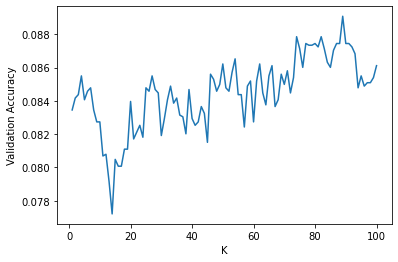

In [48]:
accuracies = []
for k in range(1,101):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_data, train_labels)
    accuracies.append(classifier.score(test_data, test_labels))

k_list=range(1,101)
plt.plot(k_list, accuracies)
plt.xlabel('K')
plt.ylabel('Validation Accuracy')
plt.show()

In [68]:
log_reg_model = LogisticRegression(multi_class="multinomial",solver="lbfgs",        max_iter=5000).fit(train_data, train_labels)

log_guesses = log_reg_model.predict(test_data)

In [54]:

print(classification_report(test_labels, log_guesses))

              precision    recall  f1-score   support

           0       0.09      0.35      0.15       860
           1       0.09      0.21      0.13       874
           2       0.08      0.17      0.10       754
           3       0.08      0.08      0.08       846
           4       0.07      0.02      0.03       858
           5       0.10      0.03      0.05       859
           6       0.09      0.08      0.09       841
           7       0.12      0.00      0.00       804
           8       0.08      0.05      0.06       789
           9       0.00      0.00      0.00       789
          10       0.09      0.02      0.03       782
          11       0.17      0.00      0.00       722

    accuracy                           0.09      9778
   macro avg       0.09      0.09      0.06      9778
weighted avg       0.09      0.09      0.06      9778



In [61]:

cart_model = DecisionTreeClassifier().fit(train_data, train_labels) 

cart_guesses = cart_model.predict(test_data) 

print(classification_report(test_labels, cart_guesses))

              precision    recall  f1-score   support

           0       0.08      0.16      0.11       860
           1       0.08      0.12      0.10       874
           2       0.09      0.13      0.10       754
           3       0.09      0.12      0.11       846
           4       0.09      0.09      0.09       858
           5       0.10      0.09      0.10       859
           6       0.09      0.07      0.08       841
           7       0.08      0.07      0.07       804
           8       0.08      0.04      0.06       789
           9       0.07      0.05      0.05       789
          10       0.05      0.03      0.03       782
          11       0.05      0.02      0.03       722

    accuracy                           0.08      9778
   macro avg       0.08      0.08      0.08      9778
weighted avg       0.08      0.08      0.08      9778



12


Text(0.5, 1.0, 'Accuracy Score: 0.08365718960932705')

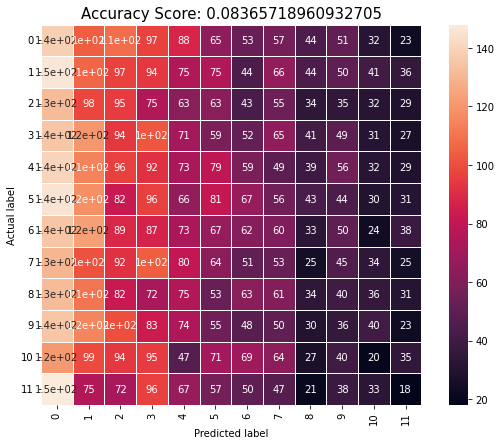

In [65]:
cart_cm = confusion_matrix(test_labels, cart_guesses)
cart_labels = cart_model.classes_
print(len(cart_labels))
plt.figure(figsize=(10,7))
sns.heatmap(data=cart_cm,linewidths=.5, annot=True,square = True)
plt.yticks(np.arange(len(cart_labels))+.5, cart_labels, rotation=0)
plt.xticks(np.arange(len(cart_labels))+.5, cart_labels, rotation=90)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(cart_model.score(test_data, test_labels))
plt.title(all_sample_title, size = 15)

12


Text(0.5, 1.0, 'Accuracy Score: 0.08611167928001637')

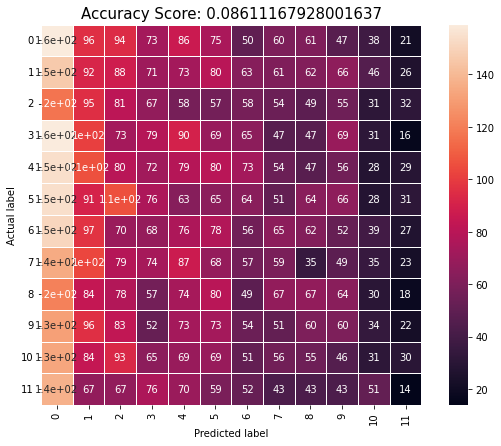

In [66]:
knn_cm = confusion_matrix(test_labels, knn_guesses)
knn_labels = classifier.classes_
print(len(knn_labels))
plt.figure(figsize=(10,7))
sns.heatmap(data=knn_cm,linewidths=.5, annot=True,square = True)
plt.yticks(np.arange(len(knn_labels))+.5, knn_labels, rotation=0)
plt.xticks(np.arange(len(knn_labels))+.5, knn_labels, rotation=90)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(classifier.score(test_data, test_labels))
plt.title(all_sample_title, size = 15)

12


Text(0.5, 1.0, 'Accuracy Score: 0.08754346492125178')

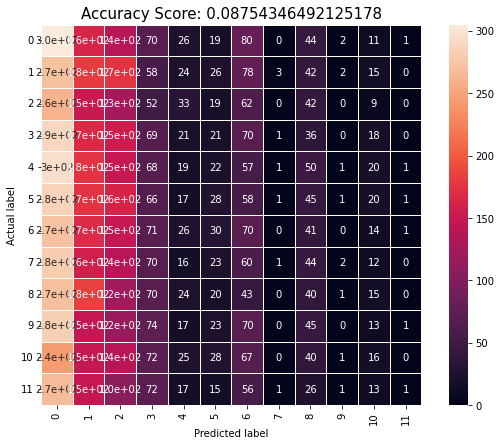

In [70]:
log_cm = confusion_matrix(test_labels, log_guesses)
log_labels = log_reg_model.classes_
print(len(log_labels))
plt.figure(figsize=(10,7))
sns.heatmap(data=log_cm,linewidths=.5, annot=True,square = True)
plt.yticks(np.arange(len(log_labels))+.5, log_labels, rotation=0)
plt.xticks(np.arange(len(log_labels))+.5, log_labels, rotation=90)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(log_reg_model.score(test_data, test_labels))
plt.title(all_sample_title, size = 15)